# Mental Attention States Classification Using EEG Data

### Pattern Recognition - Mid-term project - Group 3

| **Full name**          | **Student ID** |
|------------------------|----------------|
| Lê Hồng Cát            |  21110249      |       
| Trương Minh Hoàng      |  22280034      |
| Đặng Minh Phúc         |  22280064      |
| Trần Nguyễn Trung Tuấn |  22280101      |


# Outline
- [ 1 - Objective ](#1)
- [ 2 - Data Preprocessing ](#2)
- [ 3 - Feature Engineering ](#3)
- [ 4 - Model Development ](#4)
- [ 5 - Analysis and Visualization ](#5)
- [ 6 - Report ](#6)
- [ 7 - Self-Assessment ](#7)

<a name="1"></a>
## 1. Objective

 Classify mental attention states (focused, unfocused, drowsy) based on EEG signals using
 machine learning techniques.

__Dataset Details:__
 - Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection/data
 - Data was acquired from EMOTIV EEG devices during 34 experiments.
 - EEG data is in channels 4 to 17 of the provided Matlab files.
 - Sampling frequency: 128 Hz.

<a name="2"></a>
## 2. Data Preprocessing

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

# Load the .mat file
mat_data = loadmat('EEG Data/eeg_record1.mat')

# Inspect the content of the .mat file
print(mat_data.keys())  # Lists the variables stored in the .mat file

dict_keys(['__header__', '__version__', '__globals__', 'o'])


In [2]:
o = mat_data['o']
o.dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('timestamp', 'O'), ('data', 'O'), ('trials', 'O')])

In [3]:
columns = [
    'ED_AF3', 'ED_F7', 'ED_F3', 'ED_FC5', 'ED_T7', 'ED_P7', 'ED_O1',
    'ED_O2',  'ED_P8', 'ED_T8', 'ED_FC6', 'ED_F4', 'ED_F8', 'ED_AF4',    
]

data = o[0][0]['data']

# The EEG data is in the channels 4:17 (columns index 3:17)
data = pd.DataFrame(data[:, 3:17], columns=columns)

In [4]:
data

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,4440.000000,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744
1,4439.487179,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667
2,4438.974359,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718
3,4438.974359,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513
4,4439.487179,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308863,4436.923077,4564.615385,5625.128205,3828.717949,4024.615385,4800.512821,4904.615385,4629.230769,4749.230769,4316.923077,4144.615385,4280.512821,4335.384615,4713.333333
308864,4443.076923,4555.384615,5617.948718,3830.769231,4024.102564,4798.461538,4903.589744,4629.743590,4740.512821,4319.487179,4143.589744,4283.589744,4335.897436,4704.615385
308865,4441.538462,4554.871795,5613.846154,3828.717949,4026.666667,4795.897436,4903.076923,4627.692308,4731.794872,4320.000000,4143.076923,4285.128205,4334.871795,4701.025641
308866,4441.538462,4556.410256,5610.256410,3825.641026,4027.179487,4787.692308,4897.435897,4621.538462,4733.333333,4318.461538,4143.589744,4283.589744,4334.358974,4696.923077


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308868 entries, 0 to 308867
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ED_AF3  308868 non-null  float64
 1   ED_F7   308868 non-null  float64
 2   ED_F3   308868 non-null  float64
 3   ED_FC5  308868 non-null  float64
 4   ED_T7   308868 non-null  float64
 5   ED_P7   308868 non-null  float64
 6   ED_O1   308868 non-null  float64
 7   ED_O2   308868 non-null  float64
 8   ED_P8   308868 non-null  float64
 9   ED_T8   308868 non-null  float64
 10  ED_FC6  308868 non-null  float64
 11  ED_F4   308868 non-null  float64
 12  ED_F8   308868 non-null  float64
 13  ED_AF4  308868 non-null  float64
dtypes: float64(14)
memory usage: 33.0 MB


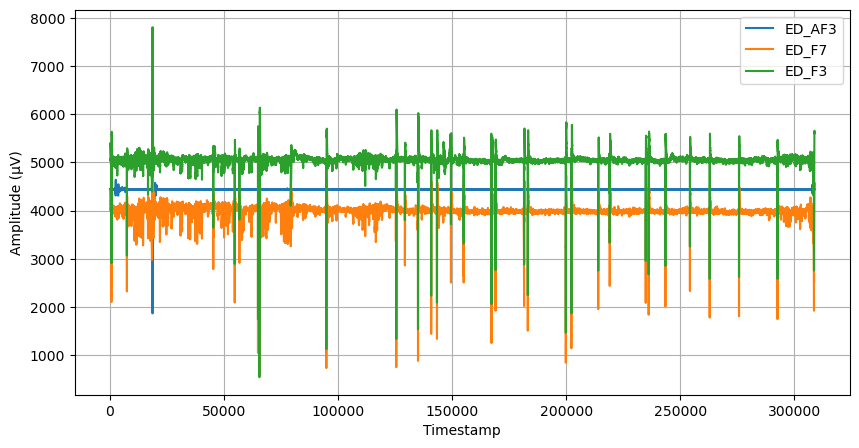

In [6]:
import matplotlib.pyplot as plt

def plot_signal_data(df, channels):
    plt.figure(figsize=(10, 5))
    for channel in channels:
        plt.plot(df.index, df[channel], label=channel)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Amplitude (µV)')
    plt.legend()
    plt.grid()
    plt.show()

channels_to_plot = ["ED_AF3", "ED_F7", "ED_F3"]
plot_signal_data(data, channels_to_plot)

### Bandpass Filtering

In [7]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, low, high, fs=128, order=5):
    nyquist = 0.5 * fs
    low = low / nyquist
    high = high / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Lọc tín hiệu từng kênh
data_filtered = data.apply(lambda col: bandpass_filter(col, 0.5, 30, fs=128))

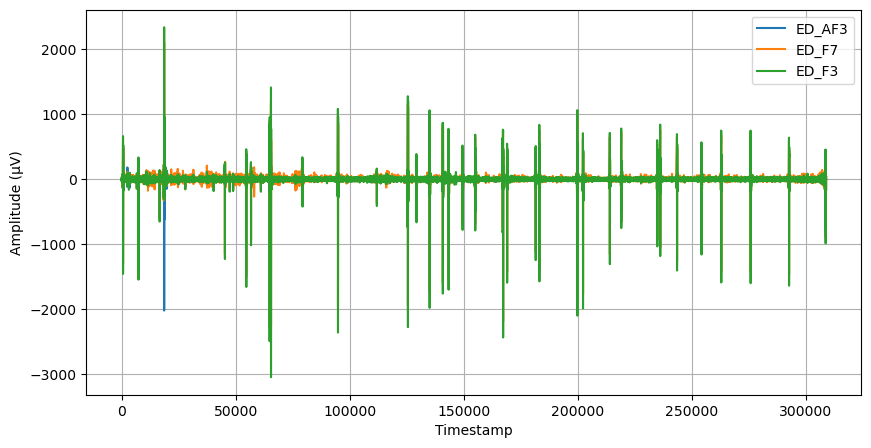

In [8]:
channels_to_plot = ["ED_AF3", "ED_F7", "ED_F3"]
plot_signal_data(data_filtered, channels_to_plot)

### Apply ICA to remove dependency between features

In [9]:
from sklearn.decomposition import FastICA

# Áp dụng ICA sau khi lọc tín hiệu
ica = FastICA()
data_ica = ica.fit_transform(data_filtered)  # Kết quả là tín hiệu đã tách độc lập

# Chuyển đổi trở lại DataFrame với các tên kênh ban đầu
data_filtered_ica = pd.DataFrame(data_ica, columns=data_filtered.columns)

/home/tmhoang/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [10]:
data_filtered_ica.head()

,ED_AF3,ED_F7,ED_F3,ED_FC5,ED_T7,ED_P7,ED_O1,ED_O2,ED_P8,ED_T8,ED_FC6,ED_F4,ED_F8,ED_AF4
0,-0.000042,0.000483,0.000429,0.000306,0.000204,-0.000488,-0.000213,-0.000486,0.000235,0.001125,-0.000117,-0.000449,0.000355,-0.000060
1,-0.000070,0.000159,0.000542,0.002418,-0.002478,0.001534,-0.000097,0.002667,0.000361,-0.001362,0.002289,0.000019,-0.000705,-0.000567
2,0.000104,-0.000059,0.000720,0.004277,-0.002954,0.002092,0.000020,0.005139,0.000409,-0.001344,0.002901,0.000166,-0.001069,-0.001010
3,0.000418,-0.000308,0.000558,0.005441,-0.002190,0.001503,0.000172,0.006546,0.000319,0.000096,0.002119,0.000165,-0.000866,-0.001177
4,0.000670,-0.000703,-0.000153,0.005774,-0.002233,0.000972,0.000455,0.007054,0.000094,-0.000127,0.001521,0.000430,-0.000675,-0.001018


Original Signal


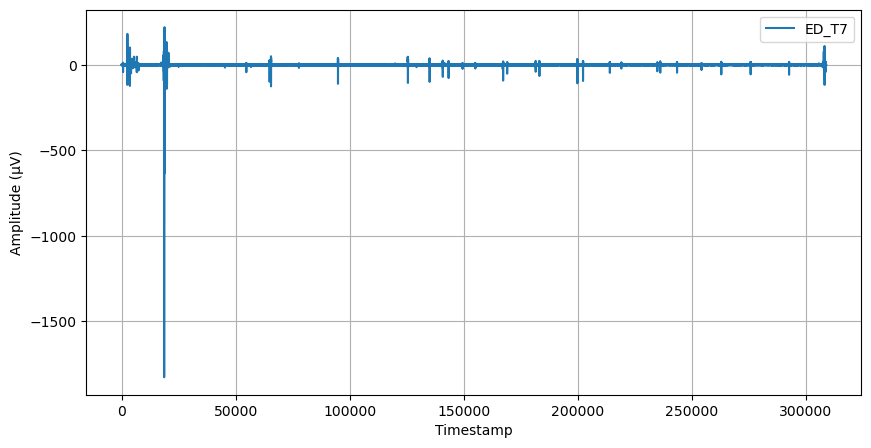

After ICA


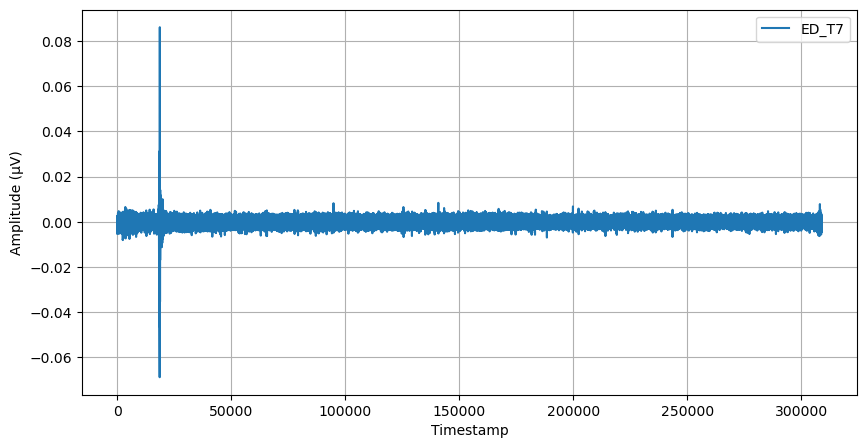

In [11]:
channels_to_plot = ["ED_T7"]

print("Original Signal")
plot_signal_data(data_filtered, channels_to_plot)

print("After ICA")
plot_signal_data(data_filtered_ica, channels_to_plot)

### Split data into 3 attention states

We need split the data into different attention states by the following given information of the dataset:
- __Focused:__ 0 to 10 min
- __Unfocused:__ 10 to 20min
- __Drownsy:__ 20 to end of experiments

In [12]:
focused_df = data_filtered_ica[:10*128*60]
unfocused_df = data_filtered_ica[10*128*60:20*128*60]
drownsy_df = data_filtered_ica[20*128*60:]
print(f"focused_df shape:\t{focused_df.shape}")
print(f"unfocused_df shape:\t{unfocused_df.shape}")
print(f"drownsy_df shape:\t{drownsy_df.shape}")

focused_df shape:	(76800, 14)
unfocused_df shape:	(76800, 14)
drownsy_df shape:	(155268, 14)


<a name="3"></a>
## 3. Feature Engineering

### Short-time Fourier transform

In [13]:
from scipy.signal import stft
import numpy as np

def compute_stft(data, fs=128, window='blackman', nperseg=256, noverlap=128):
    f, t, Zxx = stft(data, fs, window=window, nperseg=nperseg, noverlap=noverlap)
    return f, t, np.abs(Zxx)**2  # Spectrogram

def compute_spectrograms(df):
    spectrograms = {}
    for channel in df.columns:
        f, t, Sxx = compute_stft(df[channel])
        spectrograms[channel] = Sxx
    return spectrograms

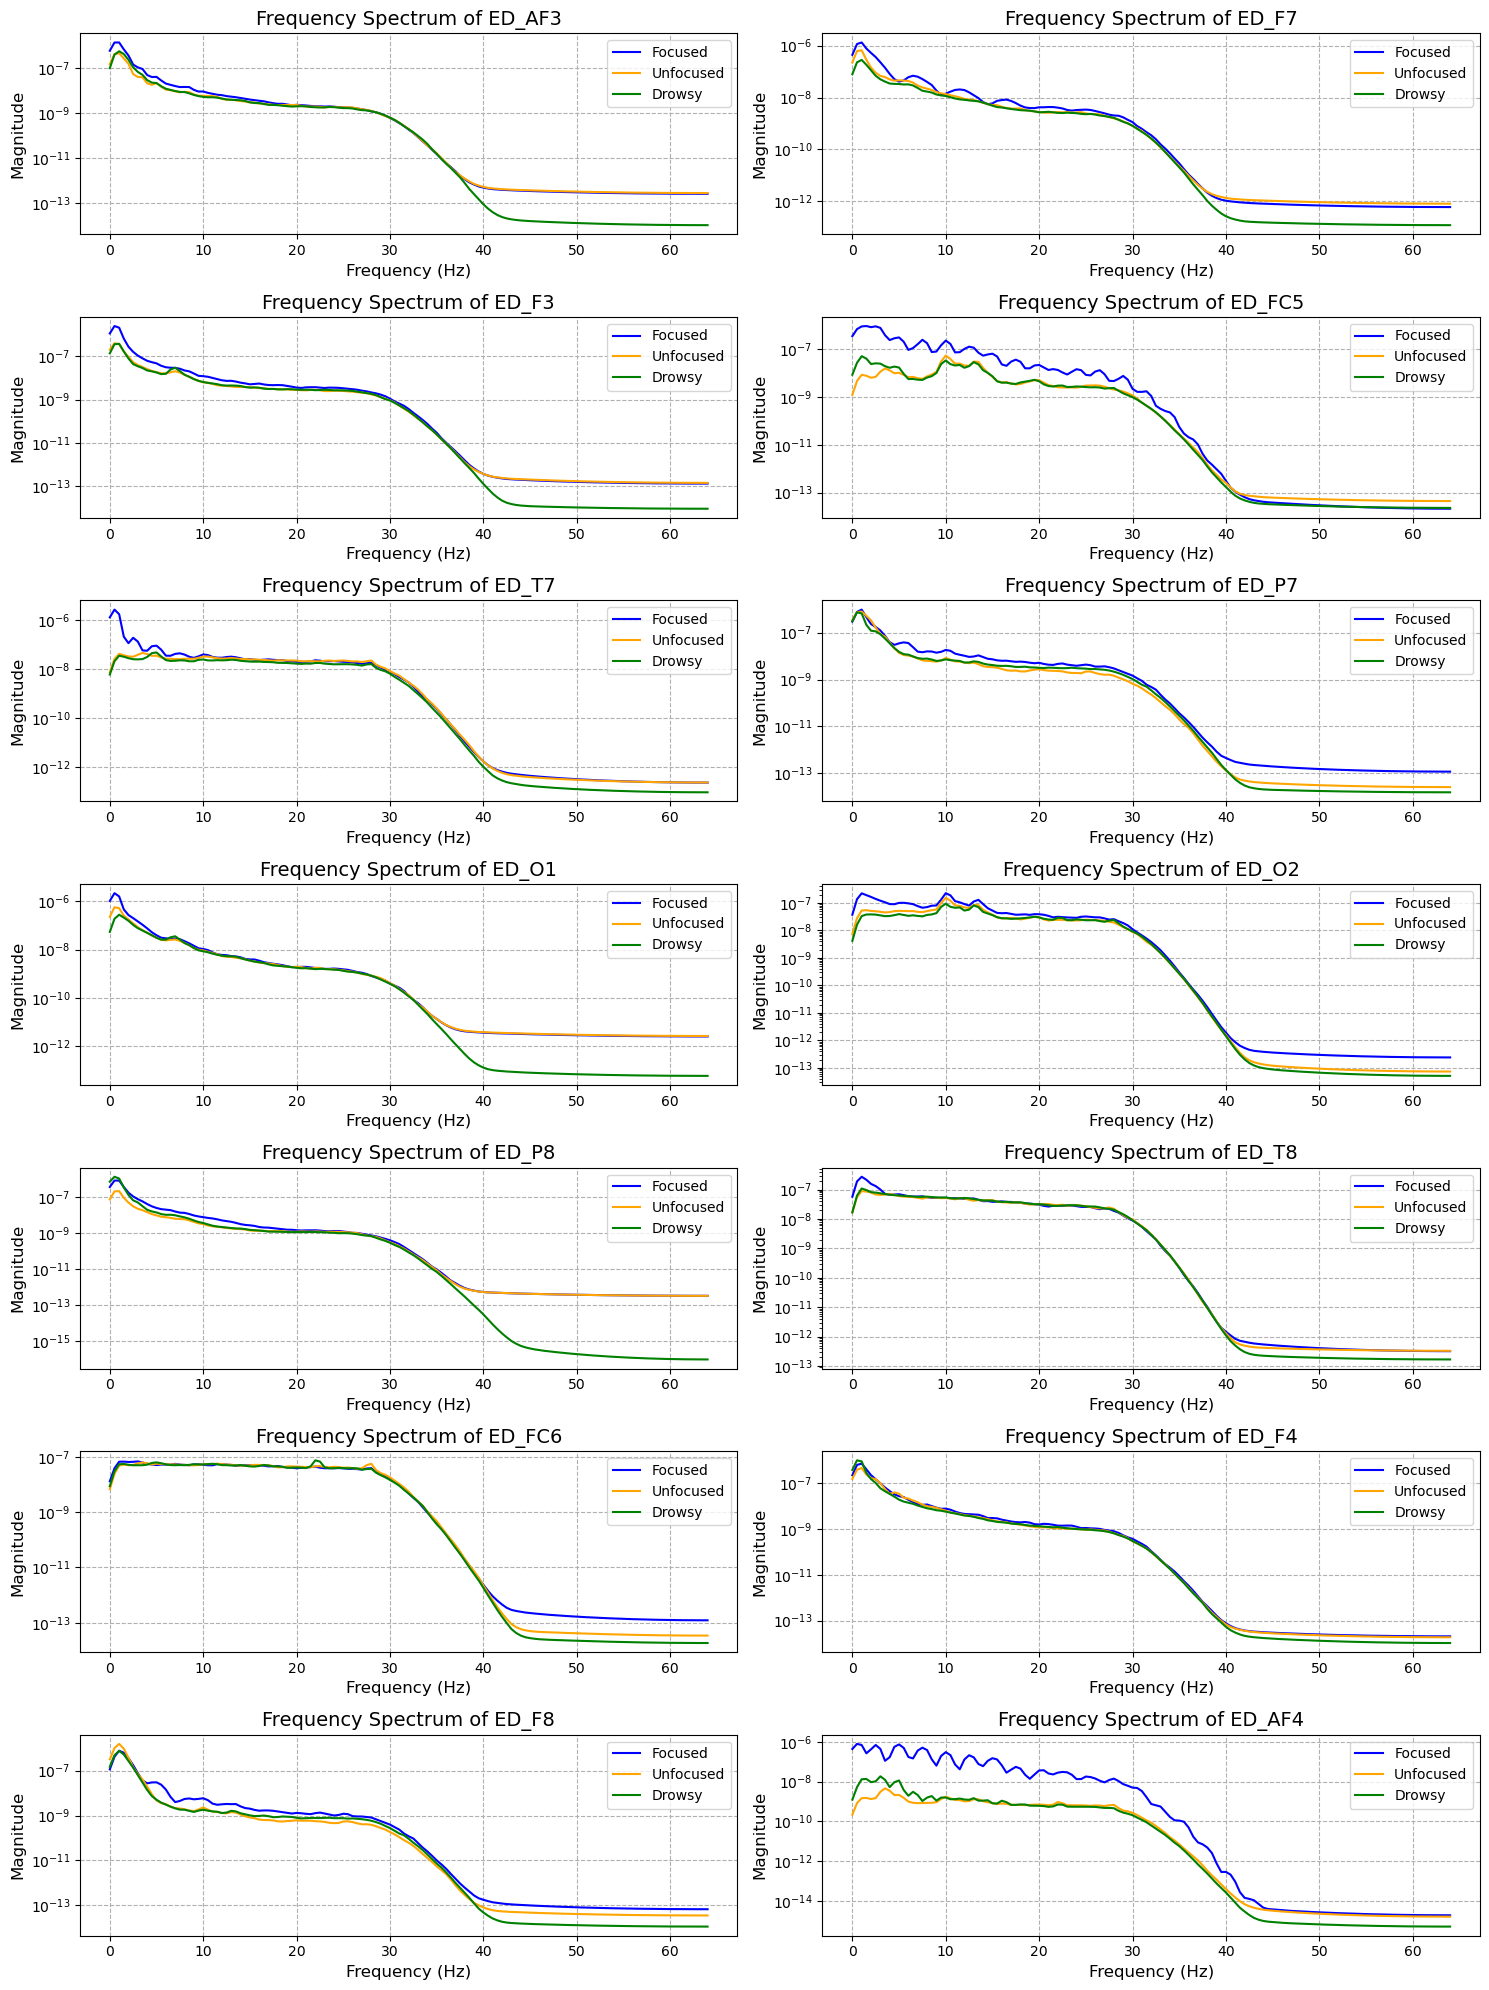

In [14]:
def compute_spectrograms(df):
    spectrograms = {}
    for channel in df.columns:
        f, t, Sxx = compute_stft(df[channel])
        spectrograms[channel] = (f, Sxx)
    return spectrograms

# Tính phổ tần số cho cả 3 DataFrame
focused_spectrograms = compute_spectrograms(focused_df)
unfocused_spectrograms = compute_spectrograms(unfocused_df)
drownsy_spectrograms = compute_spectrograms(drownsy_df)

# Vẽ biểu đồ tích hợp
plt.figure(figsize=(15, 20))

for i, channel in enumerate(focused_spectrograms.keys()):  # Duyệt qua từng kênh
    plt.subplot(7, 2, i + 1)
    
    # Lấy phổ tần số và magnitude của từng trạng thái
    freq_focused, Sxx_focused = focused_spectrograms[channel]
    freq_unfocused, Sxx_unfocused = unfocused_spectrograms[channel]
    freq_drownsy, Sxx_drownsy = drownsy_spectrograms[channel]
    
    # Tính trung bình magnitude theo thời gian
    magnitude_focused = np.mean(Sxx_focused, axis=1)
    magnitude_unfocused = np.mean(Sxx_unfocused, axis=1)
    magnitude_drownsy = np.mean(Sxx_drownsy, axis=1)
    
    # Vẽ phổ tần số trên cùng một plot
    plt.semilogy(freq_focused, magnitude_focused, label='Focused', color='blue')
    plt.semilogy(freq_unfocused, magnitude_unfocused, label='Unfocused', color='orange')
    plt.semilogy(freq_drownsy, magnitude_drownsy, label='Drowsy', color='green')
    
    plt.title(f'Frequency Spectrum of {channel}', fontsize=14)
    plt.xlabel('Frequency (Hz)', fontsize=12)
    plt.ylabel('Magnitude', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(linestyle='--')

plt.tight_layout()
plt.show()

### Extract Band Power
Brain waves can be divided into different frequency bands, including
$$
\delta(0.5–4\text{Hz}) \quad \theta(4–8\text{Hz}) \quad \alpha(8–13\text{Hz}) \quad \beta(13–30\text{Hz}) \quad \gamma(30–50\text{Hz})
$$

In [31]:
def compute_band_power(f, Sxx, bands):
    band_power = {}
    for band_name, (low, high) in bands.items():
        idx_band = np.where((f >= low) & (f <= high))[0]
        # Tính trung bình năng lượng theo các tần số trong băng
        band_power[band_name] = np.mean(np.mean(Sxx[idx_band, :], axis=0))  # Trung bình cả theo trục thời gian
    return band_power

def compute_features_dataframe(spectrograms, state_name):
    # Định nghĩa các băng tần
    bands = {
        "delta": (0.5, 4),
        "theta": (4, 8),
        "alpha": (8, 12),
        "beta": (12, 30),
        "gamma": (30, 50)
    }
    
    # Tính band power cho từng kênh
    features = []
    for channel, (f, Sxx) in spectrograms.items():
        band_power = compute_band_power(f, Sxx, bands)
        band_power["channel"] = channel
        band_power["state"] = state_name
        features.append(band_power)
    
    # Chuyển thành DataFrame
    df = pd.DataFrame(features)
    return df

In [32]:
# Tính DataFrame cho từng trạng thái
focused_df_features = compute_features_dataframe(focused_spectrograms, "focused")
unfocused_df_features = compute_features_dataframe(unfocused_spectrograms, "unfocused")
drownsy_df_features = compute_features_dataframe(drownsy_spectrograms, "drownsy")

# Kết hợp tất cả các DataFrame
combined_df = pd.concat([focused_df_features, unfocused_df_features, drownsy_df_features], ignore_index=True)

combined_df

,delta,theta,alpha,beta,gamma,channel,state
0,5.197187e-07,2.693763e-08,9.597974e-09,2.633449e-09,5.668766e-11,ED_AF3,focused
1,5.677454e-07,5.562803e-08,2.122569e-08,5.201279e-09,9.979994e-11,ED_F7,focused
2,7.121295e-07,3.660334e-08,1.317115e-08,3.996325e-09,1.012193e-10,ED_F3,focused
3,7.021924e-07,2.025850e-07,1.242172e-07,2.841484e-08,2.389662e-10,ED_FC5,focused
4,6.256471e-07,5.272651e-08,3.227623e-08,2.068603e-08,7.238002e-10,ED_T7,focused
5,3.542009e-07,2.765900e-08,1.450190e-08,5.253948e-09,1.356342e-10,ED_P7,focused
6,6.178366e-07,3.666871e-08,1.172924e-08,2.354755e-09,4.035721e-11,ED_O1,focused
7,1.461117e-07,8.650404e-08,1.203602e-07,4.208799e-08,1.039006e-09,ED_O2,focused
8,2.958034e-07,2.123602e-08,7.956012e-09,1.711250e-09,3.464673e-11,ED_P8,focused
9,1.501018e-07,6.178723e-08,5.151518e-08,3.037245e-08,8.202095e-10,ED_T8,focused
